# Introduction

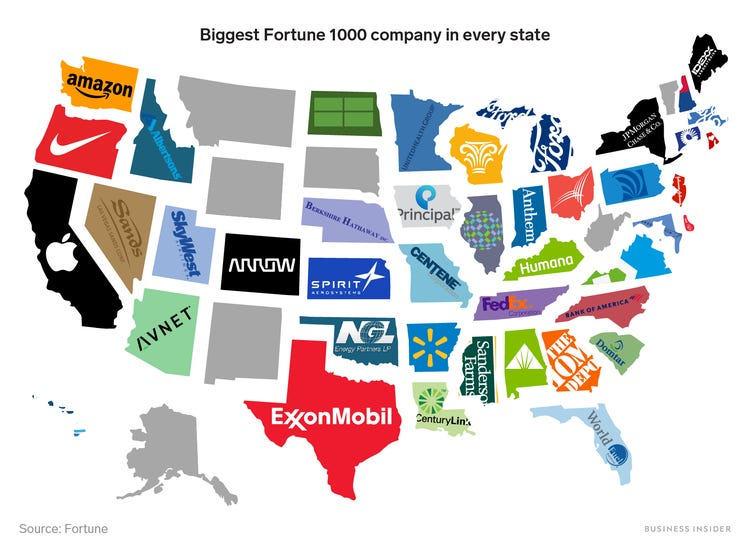

## Context
Every year Fortune, an American Business Magazine, publishes the Fortune 500, which ranks the top 500 corporations by revenue. This dataset in [kaggle](https://www.kaggle.com/winston56/fortune-500-data-2021) includes the entire Fortune 1000, as opposed to just the top 500.<br>
With this notebook we will analyse the dataset and see how different factors are What percentage of companies have women ceo's? How many companies are newcomers? What is most profitable sector ? and many other questions

## Features

- <b>Company</b> - values are the name of the company
- <b>Rank</b> - The 2021 rank established by Fortune (1-1000)
- <b>Rank Change</b> - The change in the rank from 2020 to 2021. There is only a rank change listed if the company is currently in the top 500 and was previously in the top 500.
- <b>Revenue</b> - Revenue of each company in millions. This is the criteria used to rank each company.
- <b>Profit</b> - Profit of each company in millions.
- <b>Num. of Employees</b> - The number of employees each company employs.
- <b>Sector</b> - The sector of the market the company operates in.
- <b>City</b> - The city where the company's headquarters is located.
- <b>State</b> - The state where the company's headquarters is located
- <b>Newcomer</b> - Indicates whether or not the company is new to the top Fortune 500 ("yes" or "no"). No value will be listed for companies outside of the top 500.
- <b>CEO Founder</b> - Indicates whether the CEO of the company is also the founder ("yes" or "no").
- <b>CEO Woman</b> - Indicates whether the CEO of the company is a woman ("yes" or "no").
- <b>Profitable</b> - Indicates whether the company is profitable or not ("yes" or "no").
- <b>Prev. Rank</b> - The 2020 rank of the company, as established by Fortune. There will only be previous rank data for the top 500 companies.
- <b>CEO</b> - The name of the CEO of the company
- <b>Website</b> - The url of the company website
- <b>Ticker</b> - The stock ticker symbol of public companies. Some rows will have empty values because the company is a private corporation.
- <b>Market Cap</b> - The market cap (or value) of the company in millions. Some rows will have empty values because the company is private. Market valuations were determined on January 20, 2021.

In [43]:
#Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
#Reading Dataset
fortune=pd.read_csv('D:\\Projects\\Fortune_1000.csv')
fortune.head(5)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,411690
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,5.0,Jeffrey P. Bezos,https://www.amazon.com,AMZN,1637405
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,2.0,Darren W. Woods,https://www.exxonmobil.com,XOM,177923
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,https://www.apple.com,AAPL,2221176
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,no,yes,yes,8.0,Karen S. Lynch,https://www.cvshealth.com,CVS,98496


In [45]:
#shape of dataset
fortune.shape

(1000, 18)

In [46]:
fortune.dtypes

company               object
rank                   int64
rank_change          float64
revenue              float64
profit               float64
num. of employees      int64
sector                object
city                  object
state                 object
newcomer              object
ceo_founder           object
ceo_woman             object
profitable            object
prev_rank             object
CEO                   object
Website               object
Ticker                object
Market Cap            object
dtype: object

In [47]:
#Checking null values
fortune.isnull().sum()/len(fortune)*100

company               0.0
rank                  0.0
rank_change           0.0
revenue               0.0
profit                0.2
num. of employees     0.0
sector                0.0
city                  0.0
state                 0.0
newcomer             50.0
ceo_founder           0.0
ceo_woman             0.0
profitable            0.0
prev_rank             0.0
CEO                   0.8
Website               0.0
Ticker                6.2
Market Cap            4.0
dtype: float64

#### newcomer column has 50% of data as null but it is fine as the newcomer column is of top 500 companies , we will keep as it can give some insight

#### After analyzing , the column CEO name , Website , Ticker and Prev_rank is removed as these are not that necessary for analysis.

In [48]:
#dropping columns
fortune.drop(['CEO','prev_rank','Website','Ticker'],axis=1,inplace=True)

In [49]:
#replacing the Market Cap column with proper values as the info is unkown for private companies
fortune['Market Cap']=fortune['Market Cap'].replace('-', '0')
fortune['Market Cap']=fortune['Market Cap'].astype(float)

In [50]:
fortune.head(5)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,411690.0
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,1637405.0
2,Exxon Mobil,3,-1.0,264938.0,14340.0,74900,Energy,Irving,TX,no,no,no,yes,177923.0
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,2221176.0
4,CVS Health,5,3.0,256776.0,6634.0,290000,Health Care,Woonsocket,RI,no,no,yes,yes,98496.0


#### Now the data is ready for analysis

In [51]:
fortune.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,1000.000000,1000.000000,1000.000000,998.000000,1.000000e+03,9.600000e+02
mean,500.497000,0.426000,15902.339000,1344.702806,3.461598e+04,3.417139e+04
std,288.820278,22.424169,34762.973179,4515.839383,9.202401e+04,1.287567e+05
min,1.000000,-186.000000,1990.300000,-8506.000000,5.100000e+01,0.000000e+00
25%,250.750000,0.000000,3164.200000,110.650000,6.400000e+03,1.699300e+03
50%,500.500000,0.000000,5647.000000,380.700000,1.300000e+04,6.468000e+03
75%,750.250000,0.000000,12819.775000,1061.075000,2.919200e+04,2.164862e+04
max,1000.000000,224.000000,523964.000000,81417.000000,2.200000e+06,2.221176e+06


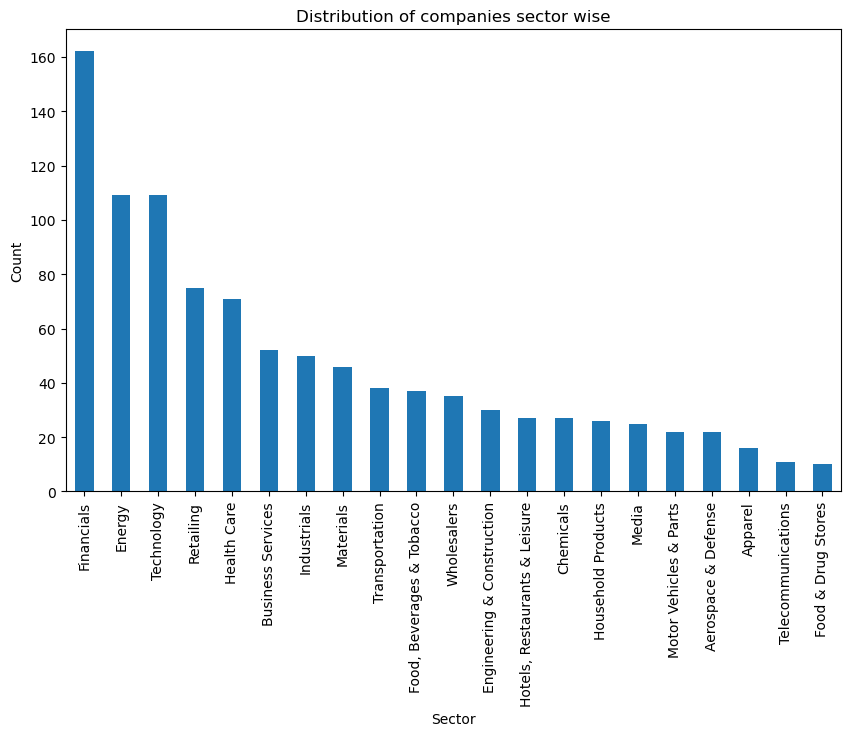

In [52]:
#Check sector wise distribution
plt.figure(figsize=(10,6))
fortune.groupby('sector')['sector'].count().sort_values(ascending=False).plot.bar()
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Distribution of companies sector wise')
plt.show()

#### Most of the companies are related to Finance and Energy and Technology are having almost same number of companies.

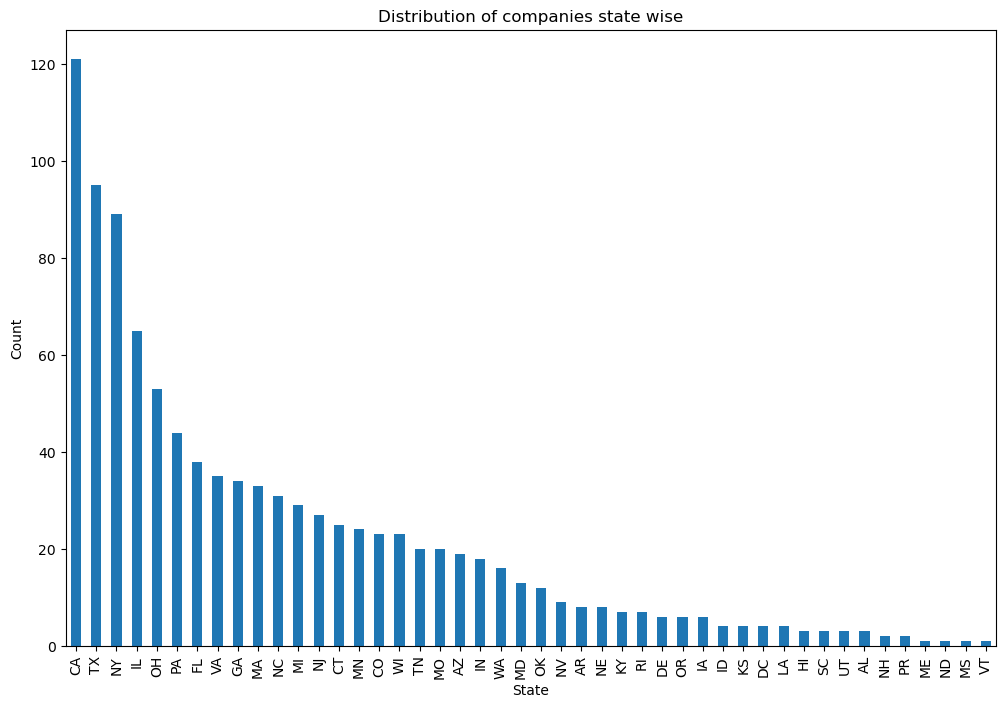

In [53]:
#Check state wise distribution
plt.figure(figsize=(12,8))
fortune.groupby('state')['state'].count().sort_values(ascending=False).plot.bar()
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of companies state wise')
plt.show()

#### The California state of USA have most number of comapnies (~122) in Fortune 1000

In [54]:
#sort by profit descding order
fortune.sort_values(by='profit',ascending=False).head(10)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
5,Berkshire Hathaway,6,-2.0,254616.0,81417.0,391500,Financials,Omaha,NE,no,no,no,yes,550878.0
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,2221176.0
20,Microsoft,21,5.0,125843.0,39240.0,144000,Technology,Redmond,WA,no,no,no,yes,1696122.0
16,JPMorgan Chase,17,1.0,142422.0,36431.0,256981,Financials,New York,NY,no,no,no,yes,414465.0
10,Alphabet,11,4.0,161857.0,34343.0,118899,Technology,Mountain View,CA,no,no,no,yes,1274139.0
24,Bank of America,25,0.0,113589.0,27430.0,208131,Financials,Charlotte,NC,no,no,no,yes,279768.0
44,Intel,45,-2.0,71965.0,21048.0,110800,Technology,Santa Clara,CA,no,no,no,yes,202996.0
29,Wells Fargo,30,-1.0,103915.0,19549.0,259800,Financials,San Francisco,CA,no,no,no,yes,99941.0
30,Citigroup,31,-1.0,103449.0,19401.0,200000,Financials,New York,NY,no,no,yes,yes,131684.0
19,Verizon Communications,20,-1.0,131868.0,19265.0,135000,Telecommunications,New York,NY,no,no,no,yes,236948.0


#### We can see Berkshire Hathaway is the most profitable company and also we can see the top 10 is dominant with Financial and Technology sector.

In [55]:
#sort by profit ascending
fortune.sort_values(by='profit').head(10)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
227,Uber Technologies,228,0.0,14147.0,-8506.0,26900,Technology,San Francisco,CA,yes,no,no,no,48226.1
188,PG&E,189,-6.0,17129.0,-7656.0,23000,Energy,San Francisco,CA,no,no,yes,no,4762.8
373,NOV,374,-17.0,8479.0,-6095.0,34645,Energy,Houston,TX,no,no,no,no,3793.9
392,Frontier Communications,393,-38.0,8107.0,-5911.0,18317,Telecommunications,Norwalk,CT,no,no,no,no,39.9
142,Lumen Technologies,143,-11.0,22401.0,-5269.0,42500,Telecommunications,Monroe,LA,no,no,no,no,10307.1
32,General Electric,33,-12.0,95214.0,-4979.0,205000,Industrials,Boston,MA,no,no,no,no,53132.0
365,Coty,366,-32.0,8648.5,-3784.2,19000,Household Products,New York,NY,no,no,yes,no,3924.4
464,APA,465,-54.0,6411.0,-3553.0,3163,Energy,Houston,TX,no,no,no,no,6595.0
542,Windstream Holdings,543,0.0,5115.4,-3090.0,11945,Telecommunications,Little Rock,AR,NaN,no,no,no,2.2
679,Lyft,680,0.0,3616.0,-2602.2,5683,Technology,San Francisco,CA,NaN,yes,no,no,8233.3


#### for Non Profitable companies it is distributed sector wise compared to what we observed for top 10 profitable companies . However 3 in top 10 Non Profitable are in energy sector

In [56]:
#sort by market cap
fortune.sort_values(by='Market Cap',ascending=False).head(10)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,2221176.0
20,Microsoft,21,5.0,125843.0,39240.0,144000,Technology,Redmond,WA,no,no,no,yes,1696122.0
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,1637405.0
10,Alphabet,11,4.0,161857.0,34343.0,118899,Technology,Mountain View,CA,no,no,no,yes,1274139.0
123,Tesla,124,20.0,24578.0,-862.0,48016,Motor Vehicles & Parts,Palo Alto,CA,no,yes,no,no,806143.0
45,Facebook,46,11.0,70697.0,18485.0,44942,Technology,Menlo Park,CA,no,yes,no,yes,768185.0
5,Berkshire Hathaway,6,-2.0,254616.0,81417.0,391500,Financials,Omaha,NE,no,no,no,yes,550878.0
136,Visa,137,16.0,22977.0,12080.0,19500,Business Services,San Francisco,CA,no,no,no,yes,496377.0
34,Johnson & Johnson,35,2.0,82059.0,15119.0,132200,Health Care,New Brunswick,NJ,no,no,no,yes,427473.0
16,JPMorgan Chase,17,1.0,142422.0,36431.0,256981,Financials,New York,NY,no,no,no,yes,414465.0


#### We can see a mix of sectors present in top 10 best companies based on market Cap and Apple has the highest market cap . Also we can see out of all Tesla is not a profitable comapny marignally while rest all are highly profitable. 

In [57]:
#sort by number of employees
fortune.sort_values(by='num. of employees',ascending=False).head(10)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,411690.0
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,1637405.0
360,Yum China Holdings,361,1.0,8776.0,713.0,450000,"Hotels, Restaurants & Leisure",Plano,TX,no,no,yes,yes,16033.2
22,Kroger,23,-3.0,122286.0,1659.0,435000,Food & Drug Stores,Cincinnati,OH,no,no,no,yes,25178.0
25,Home Depot,26,1.0,110225.0,11242.0,415700,Retailing,Atlanta,GA,no,no,no,yes,295312.0
5,Berkshire Hathaway,6,-2.0,254616.0,81417.0,391500,Financials,Omaha,NE,no,no,no,yes,550878.0
46,FedEx,47,0.0,69693.0,540.0,389500,Transportation,Memphis,TN,no,yes,no,yes,66788.0
37,IBM,38,0.0,77147.0,9431.0,383800,Technology,Armonk,NY,no,no,no,yes,115909.0
42,UPS,43,-2.0,74094.0,4440.0,377640,Transportation,Atlanta,GA,no,no,yes,yes,138166.0
36,Target,37,2.0,78112.0,3281.0,368000,Retailing,Minneapolis,MN,no,no,no,yes,94296.0


#### We can see that Walmart employees huge number of employees and it has approx 3x more employee then 2nd highest (Amazon).Retailing industry employ huge number of people.

In [58]:
#best performing company
fortune.sort_values(by='rank_change',ascending=False).iloc[0:1]

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
249,L3Harris Technologies,250,224.0,12856.0,1333.0,50000,Aerospace & Defense,Melbourne,FL,no,no,no,yes,48000.0


#### L3Harris Technologies has shown biggest jump compared to all other and can be said best performer of all.

In [59]:
#worst performing company
fortune.sort_values(by='rank_change').iloc[0:1]

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
351,Icahn Enterprises,352,-186.0,8992.0,-1098.0,28033,Financials,New York,NY,no,no,no,no,10365.7


#### Icahn Enterprises has shown biggest drop and can be said bad performer of all.

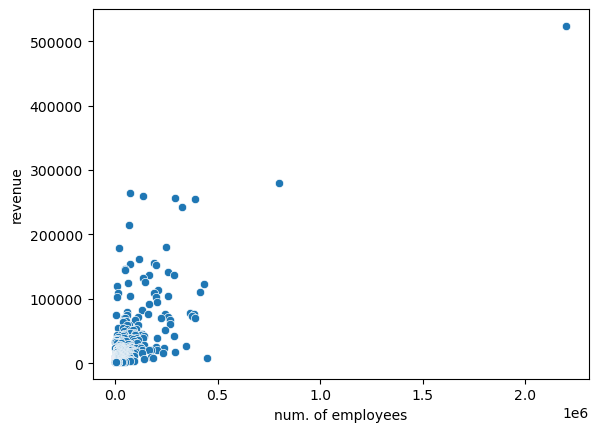

In [60]:
ax=sns.scatterplot(x=fortune['num. of employees'],y=fortune['revenue'],data=fortune)
plt.show()

#### We can see more the number of employees more the revence will be

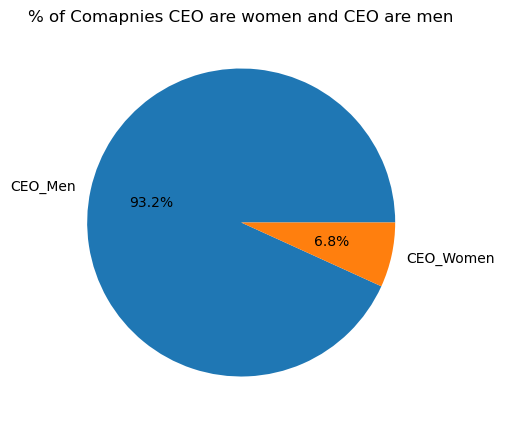

In [61]:
#CEO# women or men
fig = plt.figure(figsize=(5,5))
label=['CEO_Men','CEO_Women']
plt.pie(fortune.groupby('ceo_woman')['ceo_woman'].count(),autopct="%1.1f%%",labels=label)
plt.title('% of Comapnies CEO are women and CEO are men')
plt.show()

#### for maximum number of companies the CEO are men

In [62]:
#splitting dataset to compare comapnies were CEO are women and men 
fortune_men=fortune[fortune['ceo_woman']=='no']
fortune_women=fortune[fortune['ceo_woman']=='yes']

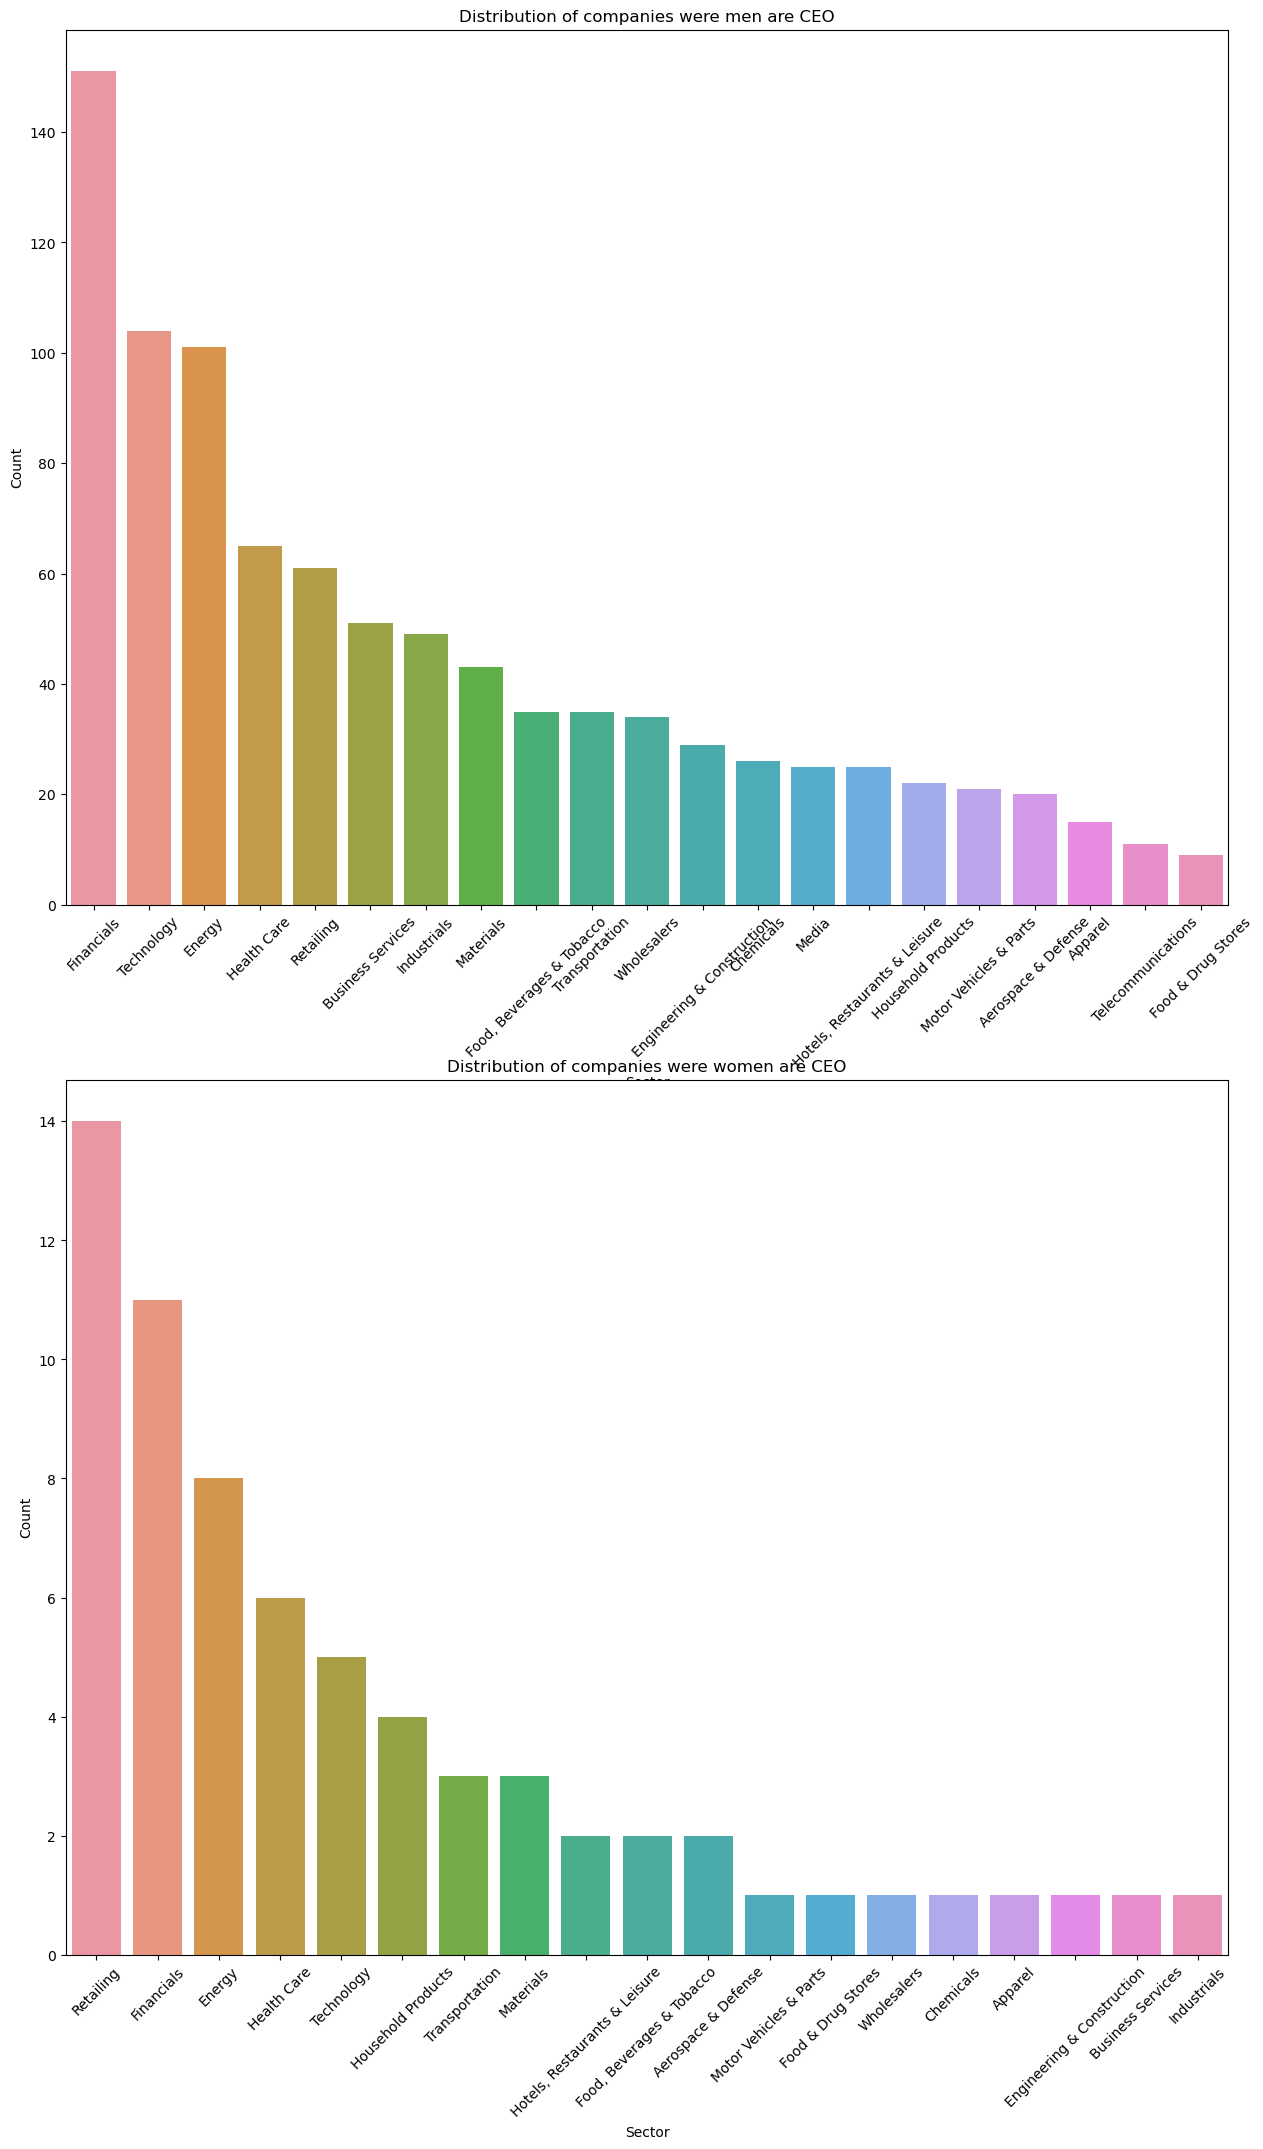

In [63]:
#getting info sector wise
fig, axes = plt.subplots(2, 1, figsize=(15, 25))
sns.countplot(ax=axes[0],data=fortune_men,x='sector',order = fortune_men['sector'].value_counts().index)
axes[0].set_title('Distribution of companies were men are CEO')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1],data=fortune_women,x='sector',order = fortune_women['sector'].value_counts().index)
axes[1].set_title('Distribution of companies were women are CEO')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
plt.show()

#### most of the men are CEO of Financial companies while women are mostly CEO of Retailing companies

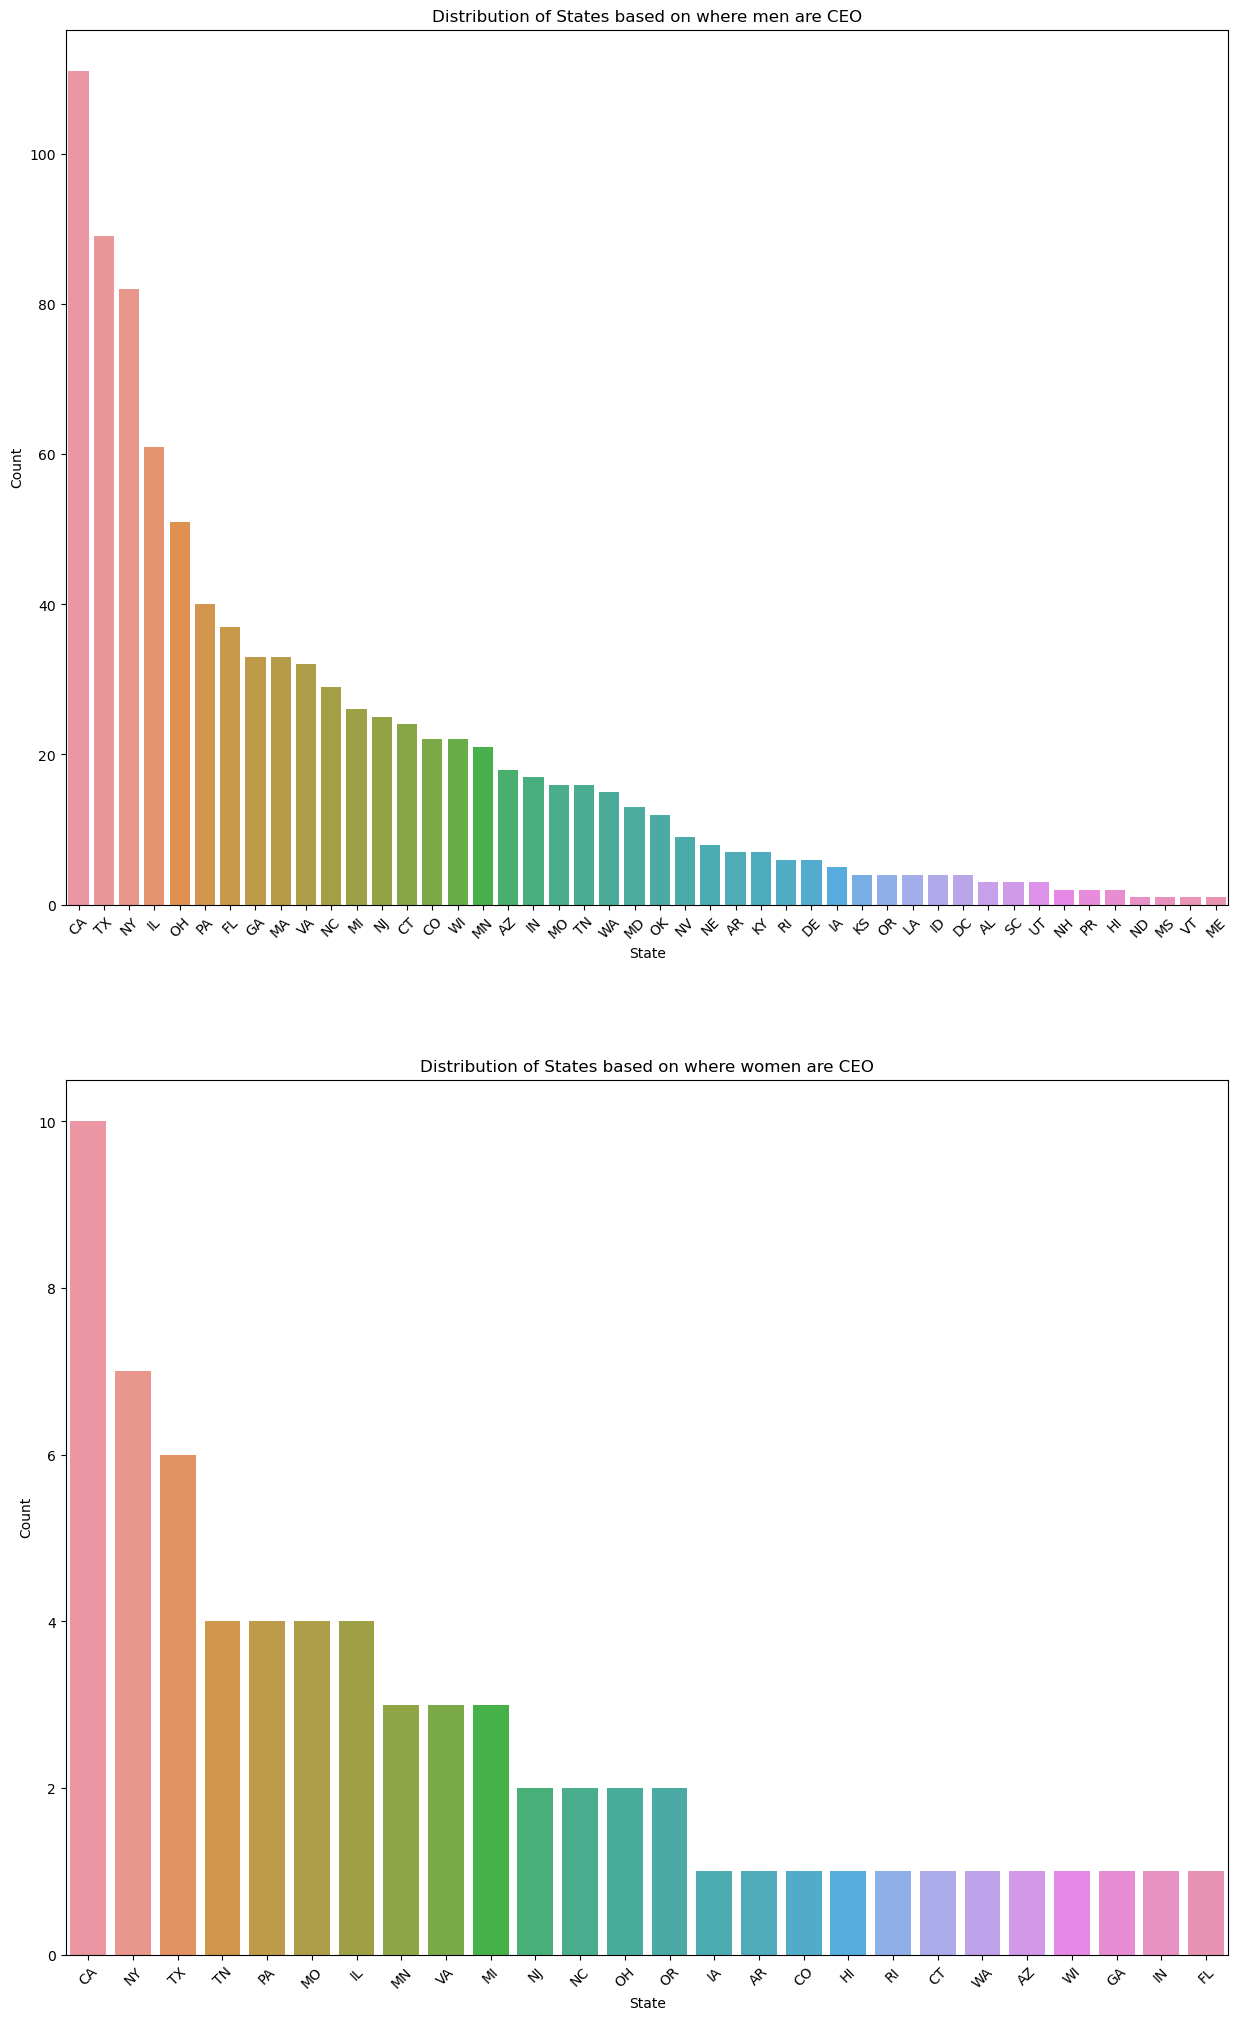

In [64]:
#getting info state wise
fig, axes = plt.subplots(2, 1, figsize=(15, 25))
sns.countplot(ax=axes[0],data=fortune_men,x='state',order = fortune_men['state'].value_counts().index)
axes[0].set_title('Distribution of States based on where men are CEO')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1],data=fortune_women,x='state',order = fortune_women['state'].value_counts().index)
axes[1].set_title('Distribution of States based on where women are CEO')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
plt.show()

#### In both the cases most of the CEOs whether male or female the maximum number of CEOs are from California.

In [65]:
fortune.head(2)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
0,Walmart,1,0.0,523964.0,14881.0,2200000,Retailing,Bentonville,AR,no,no,no,yes,411690.0
1,Amazon,2,3.0,280522.0,11588.0,798000,Retailing,Seattle,WA,no,yes,no,yes,1637405.0


In [66]:
#Getting brief information of companies where men are CEO
fortune_men.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,932.000000,932.000000,932.000000,930.000000,9.320000e+02,8.970000e+02
mean,501.436695,0.502146,15674.355579,1357.118172,3.375300e+04,3.498995e+04
std,287.922301,22.986920,34475.066977,4597.498732,9.261853e+04,1.327977e+05
min,1.000000,-186.000000,1990.300000,-8506.000000,5.100000e+01,0.000000e+00
25%,254.750000,0.000000,3169.500000,111.425000,6.379500e+03,1.713100e+03
50%,506.500000,0.000000,5580.450000,382.850000,1.300000e+04,6.580000e+03
75%,749.250000,0.000000,12602.675000,1061.075000,2.816050e+04,2.130060e+04
max,1000.000000,224.000000,523964.000000,81417.000000,2.200000e+06,2.221176e+06


In [67]:
#Getting brief information of companies where women are CEO
fortune_women.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,68.000000,68.000000,68.000000,68.000000,68.000000,63.000000
mean,487.617647,-0.617647,19027.052941,1174.904412,46443.794118,22516.660317
std,302.783851,12.412114,38637.581401,3216.689337,83169.207596,37730.439060
min,5.000000,-44.000000,2037.900000,-7656.000000,516.000000,0.000000
25%,196.500000,-1.000000,3098.625000,99.975000,7928.500000,1618.900000
50%,472.500000,0.000000,6251.400000,353.550000,13425.000000,4698.700000
75%,761.750000,3.000000,16569.500000,999.075000,41839.500000,22521.750000
max,985.000000,31.000000,256776.000000,19401.000000,450000.000000,170158.000000


#### Although we can see the number of companies where women are CEO is less but we can see that in terms of average revenue they have pretty high revenue compared to men although average profit is higer for men.

In [68]:
# We will now see the companies based on CA and get more insight about them
fortune_CA=fortune[fortune['state']=='CA']
fortune_CA.head(5)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,2221176.0
10,Alphabet,11,4.0,161857.0,34343.0,118899,Technology,Mountain View,CA,no,no,no,yes,1274139.0
14,Chevron,15,-4.0,146516.0,2924.0,48200,Energy,San Ramon,CA,no,no,no,yes,156714.0
29,Wells Fargo,30,-1.0,103915.0,19549.0,259800,Financials,San Francisco,CA,no,no,no,yes,99941.0
44,Intel,45,-2.0,71965.0,21048.0,110800,Technology,Santa Clara,CA,no,no,no,yes,202996.0


In [69]:
fortune_CA.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,121.000000,121.000000,121.000000,121.000000,121.000000,1.190000e+02
mean,522.603306,1.454545,15472.215702,2220.651240,27214.272727,9.038415e+04
std,294.228978,14.696371,33064.185126,6900.242595,45132.226324,2.580338e+05
min,4.000000,-58.000000,1997.400000,-8506.000000,117.000000,4.940000e+01
25%,255.000000,0.000000,3163.600000,127.300000,5800.000000,4.467200e+03
50%,575.000000,0.000000,4713.500000,532.400000,10700.000000,1.600900e+04
75%,751.000000,0.000000,12592.500000,1465.700000,23000.000000,6.634850e+04
max,998.000000,54.000000,260174.000000,55256.000000,259800.000000,2.221176e+06


#### We can see the companies based on CA have higher avg revenue but have very less avg profit and market cap compared to overall average

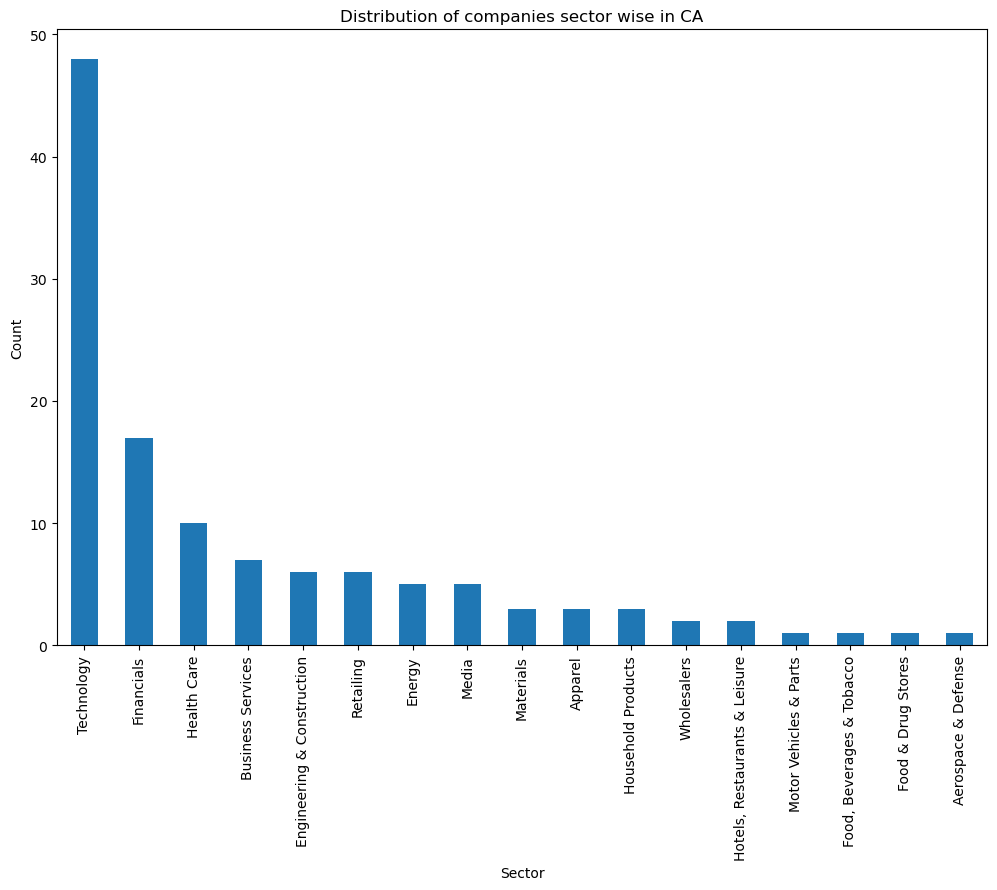

In [70]:
#Check sector wise distribution
plt.figure(figsize=(12,8))
fortune_CA.groupby('sector')['sector'].count().sort_values(ascending=False).plot.bar()
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Distribution of companies sector wise in CA')
plt.show()

#### In CA most of companies are Technology and Finance related

In [71]:
#checking the tech companies 
fortune_CA[fortune_CA['sector']=='Technology']
fortune_CA.head(10)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
3,Apple,4,-1.0,260174.0,55256.0,137000,Technology,Cupertino,CA,no,no,no,yes,2221176.0
10,Alphabet,11,4.0,161857.0,34343.0,118899,Technology,Mountain View,CA,no,no,no,yes,1274139.0
14,Chevron,15,-4.0,146516.0,2924.0,48200,Energy,San Ramon,CA,no,no,no,yes,156714.0
29,Wells Fargo,30,-1.0,103915.0,19549.0,259800,Financials,San Francisco,CA,no,no,no,yes,99941.0
44,Intel,45,-2.0,71965.0,21048.0,110800,Technology,Santa Clara,CA,no,no,no,yes,202996.0
45,Facebook,46,11.0,70697.0,18485.0,44942,Technology,Menlo Park,CA,no,yes,no,yes,768185.0
48,Walt Disney,49,4.0,69570.0,11054.0,223000,Media,Burbank,CA,no,no,no,yes,315029.0
57,HP,58,-3.0,58756.0,3152.0,56000,Technology,Palo Alto,CA,no,no,no,yes,32499.0
62,Cisco Systems,63,1.0,51904.0,11621.0,75900,Technology,San Jose,CA,no,no,no,yes,191585.0
81,Oracle,82,-1.0,39506.0,11083.0,136000,Technology,Redwood City,CA,no,no,yes,yes,170158.0


#### from the technology companies we can see that all big tech companies like google apple facebook are all based on California . Silicon Valley indeed.

In [72]:
#Checking the newcomer compnanies in Fortune500
fortune_newcomer=fortune[fortune['newcomer']=='yes']
fortune_newcomer.head(5)

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,Market Cap
77,Dow,78,0.0,42951.0,-1359.0,36500,Chemicals,Midland,MI,yes,no,no,no,30430.0
128,Baker Hughes,129,0.0,23838.0,128.0,68000,Energy,Houston,TX,yes,no,no,yes,10827.3
227,Uber Technologies,228,0.0,14147.0,-8506.0,26900,Technology,San Francisco,CA,yes,no,no,no,48226.1
233,Corteva,234,0.0,13846.0,-959.0,21000,"Food, Beverages & Tobacco",Wilmington,DE,yes,no,no,no,22043.0
279,Fox,280,0.0,11389.0,1595.0,7700,Media,New York,NY,yes,no,no,yes,14142.9


#### We can see that out of newcomers in Fortune500 60% companies are not profitable 

In [73]:
# Now we will split the top 100 in 2 parts to analyze
fortune_top_500=fortune[fortune['rank']<=500]
fortune_bottom_500=fortune[fortune['rank']>500]

In [74]:
fortune_top_500.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,500.0000,500.000000,500.00000,500.000000,5.000000e+02,4.810000e+02
mean,250.4940,0.852000,28420.20920,2445.367000,5.838409e+04,6.093191e+04
std,144.4748,31.722717,45872.35333,6171.701798,1.252956e+05,1.775742e+05
min,1.0000,-186.000000,5655.00000,-8506.000000,1.300000e+03,0.000000e+00
25%,125.7500,-7.000000,8462.57500,303.450000,1.178225e+04,5.142200e+03
50%,250.5000,0.000000,12831.85000,889.500000,2.619000e+04,1.536600e+04
75%,375.2500,10.000000,24331.80000,2459.275000,6.010775e+04,4.800000e+04
max,500.0000,224.000000,523964.00000,81417.000000,2.200000e+06,2.221176e+06


In [75]:
fortune_bottom_500.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,500.000000,500.0,500.000000,498.000000,500.000000,479.000000
mean,750.500000,0.0,3384.468800,239.618273,10847.862000,7299.139875
std,144.481833,0.0,1027.320554,472.313873,11077.169391,12322.877760
min,501.000000,0.0,1990.300000,-3090.000000,51.000000,2.200000
25%,625.750000,0.0,2486.675000,56.075000,4332.250000,1088.200000
50%,750.500000,0.0,3164.000000,195.900000,7900.000000,2806.800000
75%,875.250000,0.0,4170.600000,419.225000,13737.500000,8106.550000
max,1000.000000,0.0,5639.000000,2404.300000,94000.000000,105782.000000


#### We can see there is a very huge 1st half of Top_1000 companies and 2nd half in every aspect.

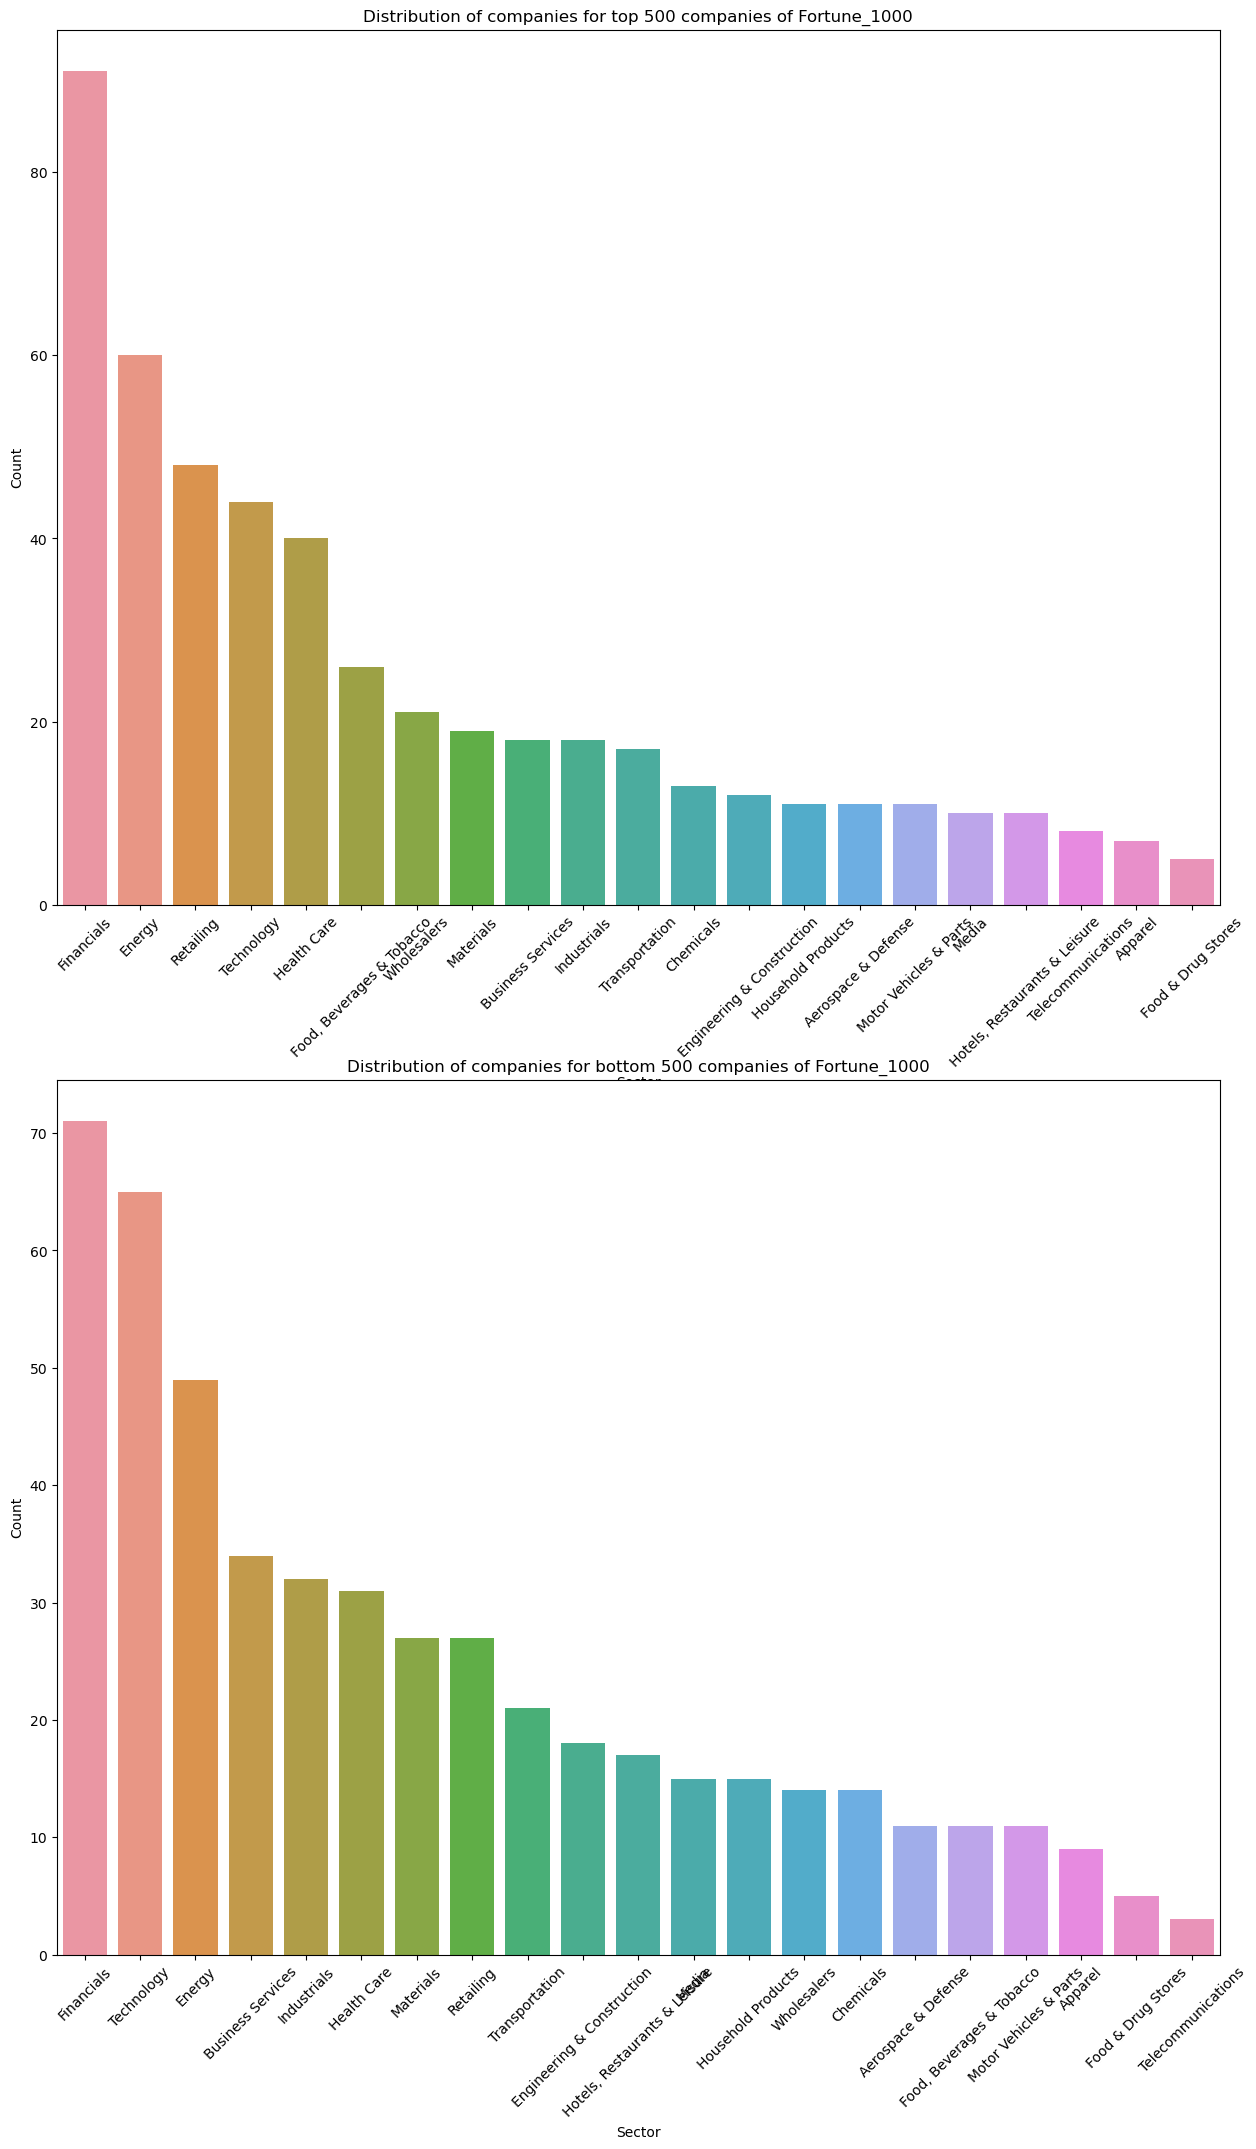

In [76]:
#check the sector wise distribution
fig, axes = plt.subplots(2, 1, figsize=(15, 25))
sns.countplot(ax=axes[0],data=fortune_top_500,x='sector',order = fortune_top_500['sector'].value_counts().index)
axes[0].set_title('Distribution of companies for top 500 companies of Fortune_1000')
axes[0].set_xlabel('Sector')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
sns.countplot(ax=axes[1],data=fortune_bottom_500,x='sector',order = fortune_bottom_500['sector'].value_counts().index)
axes[1].set_title('Distribution of companies for bottom 500 companies of Fortune_1000')
axes[1].set_xlabel('Sector')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)
plt.show()

#### We can see that in both the highest number of companies present are related to Finance

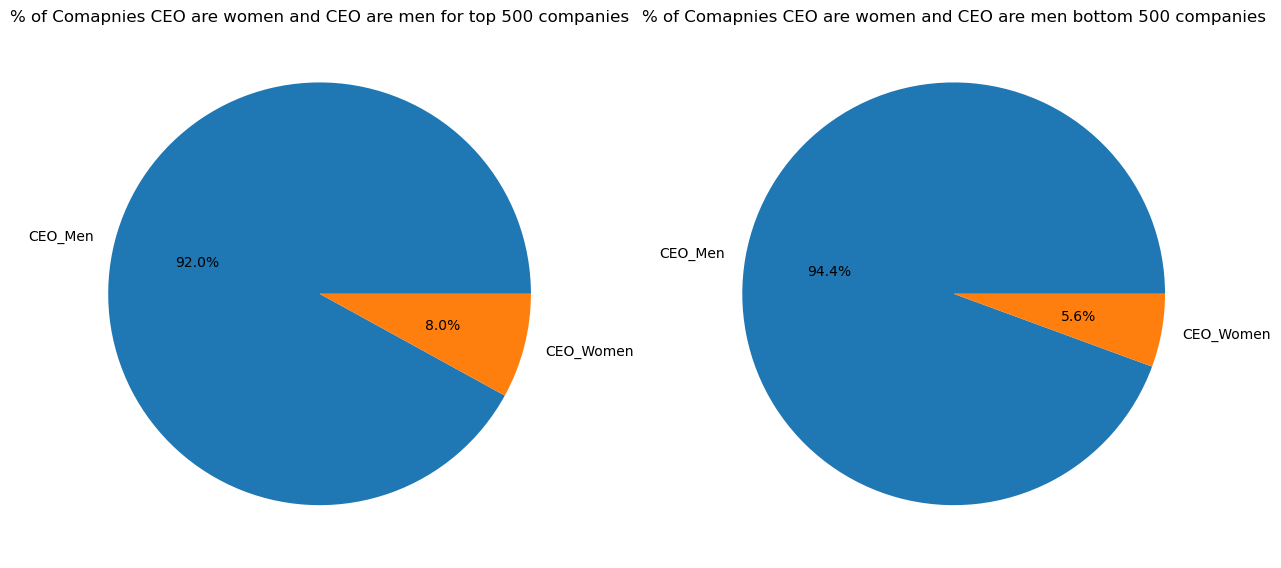

In [77]:
#CEO women or men
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
label=['CEO_Men','CEO_Women']
axes[0].pie(fortune_top_500.groupby('ceo_woman')['ceo_woman'].count(),autopct="%1.1f%%",labels=label)
axes[0].set_title('% of Comapnies CEO are women and CEO are men for top 500 companies')
axes[1].pie(fortune_bottom_500.groupby('ceo_woman')['ceo_woman'].count(),autopct="%1.1f%%",labels=label)
axes[1].set_title('% of Comapnies CEO are women and CEO are men bottom 500 companies')
plt.show()

#### We can see that in case of bottom 500 companies there are less number of Women CEO compared to top 500

In [78]:
# now we will compare the financial and technology and retail comapnies as they are dominant in top 100
fortune_finance=fortune[fortune['sector']=='Financials']
fortune_tech=fortune[fortune['sector']=='Technology']
fortune_retail=fortune[fortune['sector']=='Retailing']

In [79]:
fortune_finance.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,162.000000,162.000000,162.000000,162.000000,162.000000,137.000000
mean,475.209877,4.296296,16968.721605,2564.950000,22052.753086,28995.149635
std,294.457168,24.276842,30234.842296,7633.391055,48504.809127,66682.450287
min,6.000000,-186.000000,1997.400000,-1733.000000,51.000000,0.000000
25%,226.500000,0.000000,3304.725000,385.950000,3335.250000,3046.600000
50%,451.000000,0.000000,6671.850000,858.900000,7429.000000,8398.600000
75%,730.750000,5.000000,14222.250000,1981.300000,17898.000000,27682.000000
max,998.000000,106.000000,254616.000000,81417.000000,391500.000000,550878.000000


In [80]:
fortune_tech.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,109.000000,109.000000,109.000000,109.000000,109.000000,1.060000e+02
mean,548.743119,0.779817,15387.682569,2506.329358,33736.541284,9.318628e+04
std,294.648139,14.285682,33964.763979,7776.819257,55922.428187,3.028323e+05
min,4.000000,-46.000000,2068.300000,-8506.000000,2300.000000,2.728000e+02
25%,292.000000,0.000000,2988.100000,137.000000,8400.000000,5.983000e+03
50%,601.000000,0.000000,4445.400000,438.500000,13896.000000,1.539825e+04
75%,787.000000,0.000000,10918.000000,1353.000000,29650.000000,4.182175e+04
max,972.000000,54.000000,260174.000000,55256.000000,383800.000000,2.221176e+06


In [81]:
fortune_retail.describe()

,rank,rank_change,revenue,profit,num. of employees,Market Cap
count,75.000000,75.000000,75.000000,75.000000,7.500000e+01,7.300000e+01
mean,439.373333,-0.040000,25143.777333,923.753333,9.179213e+04,4.396288e+04
std,284.957264,20.780344,70128.706223,2580.648152,2.726609e+05,1.993790e+05
min,1.000000,-118.000000,2019.200000,-984.600000,4.750000e+03,1.390000e+01
25%,241.000000,-2.000000,3943.800000,32.400000,1.421000e+04,5.671000e+02
50%,380.000000,0.000000,8351.900000,191.300000,2.594600e+04,2.265000e+03
75%,650.000000,2.500000,13324.350000,563.200000,6.097500e+04,9.893600e+03
max,990.000000,98.000000,523964.000000,14881.000000,2.200000e+06,1.637405e+06


In [82]:
print("Retail industry have ",fortune_retail['num. of employees'].sum()," employees")
print("Technology industry have ",fortune_tech['num. of employees'].sum()," employees")
print("Finance industry have ",fortune_finance['num. of employees'].sum()," employees")

Retail industry have  6884410  employees
Technology industry have  3677283  employees
Finance industry have  3572546  employees


#### We can see that retail has the highest average revenue out of three sector . 
#### Profit-wise Financial have higher profit followed closely by technology. 
#### Tech companies have by far highest avg Market cap. 
#### Retail company have by far huge number of employees compared to other two.

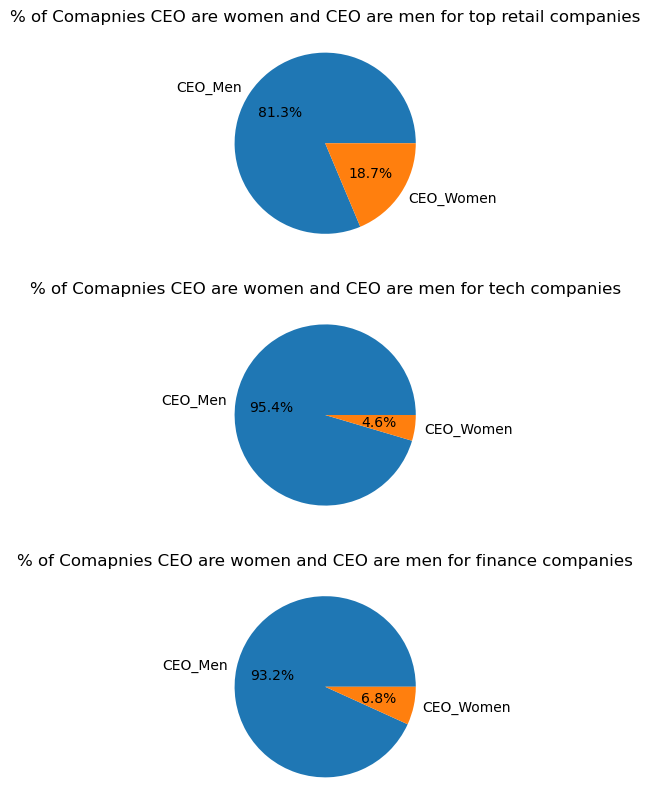

In [83]:
#CEO women or men
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
label=['CEO_Men','CEO_Women']
axes[0].pie(fortune_retail.groupby('ceo_woman')['ceo_woman'].count(),autopct="%1.1f%%",labels=label)
axes[0].set_title('% of Comapnies CEO are women and CEO are men for top retail companies')
axes[1].pie(fortune_tech.groupby('ceo_woman')['ceo_woman'].count(),autopct="%1.1f%%",labels=label)
axes[1].set_title('% of Comapnies CEO are women and CEO are men for tech companies')
axes[2].pie(fortune_finance.groupby('ceo_woman')['ceo_woman'].count(),autopct="%1.1f%%",labels=label)
axes[2].set_title('% of Comapnies CEO are women and CEO are men for finance companies')
plt.show()

#### For retail industry have higest number of Women CEO comapred to other two

In [84]:
print("Top rated retail company is : ",fortune_retail[fortune_retail['rank']==fortune_retail['rank'].min()].iloc[0]['company'])
print("Top rated technology company is : ",fortune_tech[fortune_tech['rank']==fortune_tech['rank'].min()].iloc[0]['company'])
print("Top rated finance company is : ",fortune_finance[fortune_finance['rank']==fortune_finance['rank'].min()].iloc[0]['company'])

Top rated retail company is :  Walmart
Top rated technology company is :  Apple
Top rated finance company is :  Berkshire Hathaway
